## Introduction to Machine Learning with Scikit Learn 

#### What is machine learning?

There are many ways to describe what is machine learning, you can find one at https://www.ibm.com/cloud/learn/machine-learning


I like what Addreas Mueller described in the youtube video https://www.youtube.com/watch?v=4PXAztQtoTg:
- Predictive Modeling 101: Make predictions of outcome of repeated events.
- Machine learning is useful when the frequency of the repetitive envent is high, or the historical observations or data is large, and an individual mistake is not too costly 

**All models are wrong, but some are useful** - George Box

Scikit Learn - Library of Machine Learning algorithms, built on top of Python, NumPy, SciPy, Cython

https://scikit-learn.org/

Now let's build a model using the KC house data set from https://www.kaggle.com/harlfoxem/housesalesprediction to predict house price


## Get the data

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# np.set_printoptions(suppress=True)

In [2]:
df = pd.read_csv('kaggle_data/kc_house_data.csv')
print(f"sample size = {df.shape[0]}\nnumber of columns = {df.shape[1]}")
df.head()

sample size = 21613
number of columns = 21


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Check the data type and statistics

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [4]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## Exploratory data analysis

Check the house price distributions

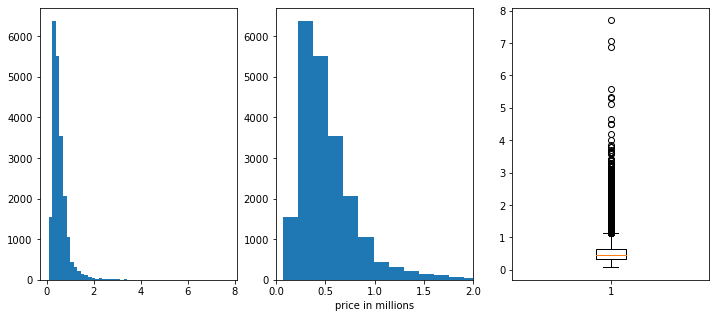

In [5]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(12,5))
ax1.hist(df['price']/1000000, bins=50)
ax2.hist(df['price']/1000000, bins=50)
ax2.set_xlim(0,2)
ax2.set_xlabel('price in millions')
ax3.boxplot(df['price']/1000000);

From above plot we see the house price has a long tail with a few very expensive houses, but most house prices are below 2 million dollrs, we could remove the house sample with price over 2 millions which are outliers based on the statistic boxplot

In [7]:
# the % house price over 2 millions
(df['price'] > 2000000).mean() * 100

0.9161153009762643

So the houses which have price above 2 millions only count for less than 1% of all house data, we can simply remove them

In [8]:
df = df[df['price'] <= 2000000]

In [9]:
df.columns
# From the available columns, how do you want to pick up the feature(s)

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

Check the corralations

In [10]:
df.corr().style.background_gradient(cmap='coolwarm')

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.014363,0.003488,0.008865,-0.008619,-0.131775,0.019801,0.001686,0.016989,-0.023557,0.012962,-0.008153,-0.002271,0.021535,-0.015625,-0.007673,-0.000909,0.020688,0.000630,-0.138491
price,-0.014363,1.000000,0.315200,0.507863,0.680043,0.101464,0.278699,0.149557,0.349333,0.036667,0.681109,0.585286,0.285879,0.064662,0.117511,-0.046360,0.362183,0.041175,0.601657,0.090261
bedrooms,0.003488,0.315200,1.000000,0.508869,0.580005,0.029581,0.168937,-0.025569,0.063308,0.026371,0.346058,0.470802,0.296079,0.158009,0.015280,-0.152407,-0.013673,0.133050,0.384119,0.027153
bathrooms,0.008865,0.507863,0.508869,1.000000,0.741459,0.084565,0.503828,0.019243,0.152297,-0.131376,0.649333,0.668177,0.256412,0.522375,0.042691,-0.205040,0.016114,0.234054,0.554675,0.083672
sqft_living,-0.008619,0.680043,0.580005,0.741459,1.000000,0.174430,0.353934,0.035494,0.241046,-0.066319,0.749116,0.868155,0.406587,0.338707,0.041580,-0.204597,0.042532,0.261331,0.754718,0.184711
sqft_lot,-0.131775,0.101464,0.029581,0.084565,0.174430,1.000000,-0.006867,0.019766,0.072393,-0.008426,0.112529,0.184058,0.010861,0.052700,0.007118,-0.129979,-0.087129,0.229397,0.145352,0.717124
floors,0.019801,0.278699,0.168937,0.503828,0.353934,-0.006867,1.000000,0.010658,0.016053,-0.268260,0.458926,0.528781,-0.263868,0.496253,0.004037,-0.059886,0.047020,0.128458,0.276640,-0.012910
waterfront,0.001686,0.149557,-0.025569,0.019243,0.035494,0.019766,0.010658,1.000000,0.355868,0.015824,0.030864,0.019720,0.034854,-0.036743,0.089414,0.045611,-0.026672,-0.051907,0.042240,0.027955
view,0.016989,0.349333,0.063308,0.152297,0.241046,0.072393,0.016053,0.355868,1.000000,0.041489,0.213669,0.126116,0.251072,-0.057551,0.095410,0.092139,-0.003540,-0.078136,0.251381,0.069111
condition,-0.023557,0.036667,0.026371,-0.131376,-0.066319,-0.008426,-0.268260,0.015824,0.041489,1.000000,-0.153200,-0.168149,0.176588,-0.359543,-0.060563,-0.000112,-0.015818,-0.105119,-0.100052,-0.002739


The above correlation data may not display the color gird properly, as in github for example. Without color grid, it is hard to visualize the different correlations. So let's also plot the heatmap of correlations.

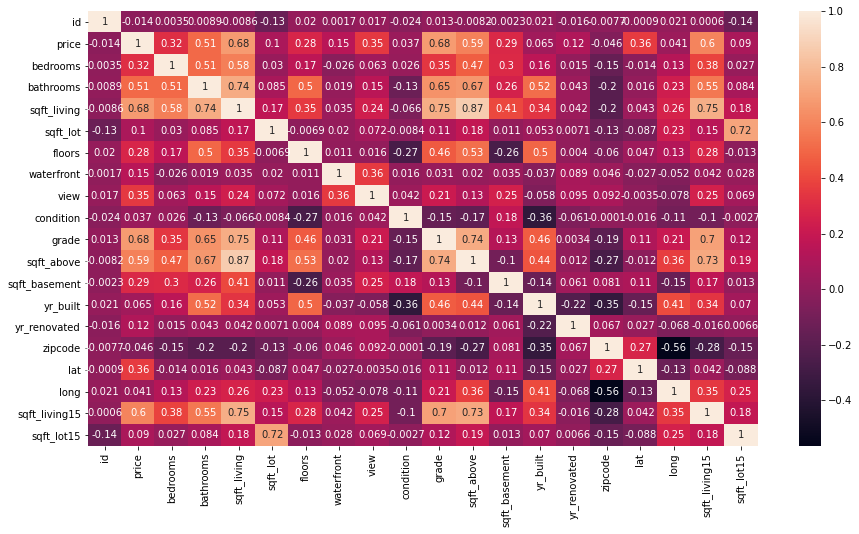

In [61]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
sns.heatmap(df.corr().round(4), annot=True, ax=ax);

Check the corralation related to house price 

In [13]:
pd.DataFrame(df.corr()['price'].sort_values(ascending=False)).style.background_gradient(cmap='coolwarm')#.set_precision(2)

,price
price,1.000000
grade,0.681109
sqft_living,0.680043
sqft_living15,0.601657
sqft_above,0.585286
bathrooms,0.507863
lat,0.362183
view,0.349333
bedrooms,0.315200
sqft_basement,0.285879


From above we see sqrt_living and sqrt_above has very high corrlation of 0.87. Let's visualize it below:

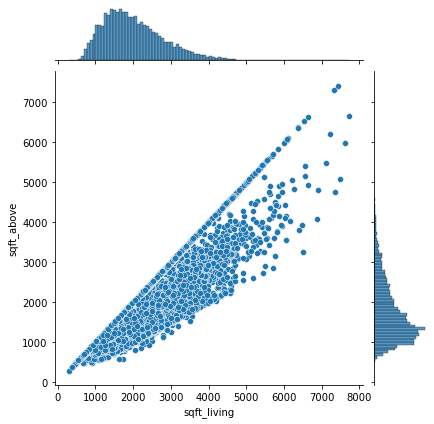

In [62]:
sns.jointplot(x='sqft_living', y='sqft_above', data=df);

sqrt_living has the highest correlation price, so we can keep sqrt_living and remove the correlated sqrt_above from our feature when train model. Now let's visualize relationship between sqft_living and price

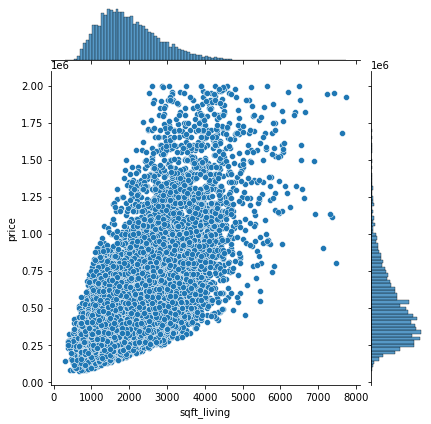

In [14]:
sns.jointplot(x='sqft_living', y='price', data=df);

We also see that yr_built has a low correlation with price, which is a little counter intuitive, so let's plot the relationship between yr_built and price

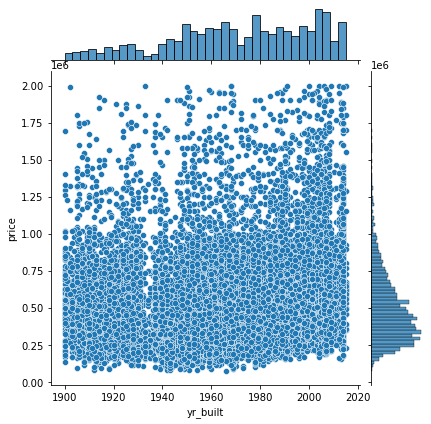

In [15]:
sns.jointplot(x='yr_built', y='price', data=df);

The result show that year built does not really have meaningful impact to price

### Select features

what feature(s) do we want to pick?

Let's first do a simply model that only consider one feature of sqft_living. Then we will choose multiple features to to train model to compare model performance from the two approaches.

1. Model with only one feature: sqft_living
2. Model with mutiple features: we already see that sqrt_above is highly correlated with sqft_living so we exclude it from the feature, we will pick the features that has corr value above 0.2:
sqft_living, grade, sqft_living15, bathrooms, lat, view, bedrooms, sqft_basement, floors

Uncomment the below code to try both features

In [28]:
# features = ['sqft_living']
features  = ['sqft_living', 'grade', 'sqft_living15', 'bathrooms',
             'lat', 'view', 'bedrooms', 'sqft_basement', 'floors']

Get the training features as X

In [29]:
X = df[features]#.to_numpy()
print(X.shape)
X.iloc[0]

(21415, 9)


sqft_living      1180.0000
grade               7.0000
sqft_living15    1340.0000
bathrooms           1.0000
lat                47.5112
view                0.0000
bedrooms            3.0000
sqft_basement       0.0000
floors              1.0000
Name: 0, dtype: float64

Get the target labels as y. Here we have lower case y to denote it as vector, not matrix

In [30]:
y = df['price']#.to_numpy()
# y = y[:, None]
y.shape

(21415,)

## Split train and test data

Here we choose 80/20 split where we use 80% of sample data to train model, and set aside 20% of sample to test the model prediction. We also set random_state so we can the same random sample for train and test for model evaluation later

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((17132, 9), (4283, 9), (17132,), (4283,))

## Defind a linear regression model

using default hyper paramters https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

LinearRegression fits a linear model with coefficients w = (w1, …, wp) to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation.

In [32]:
# Build a model with all default parameters
model = LinearRegression()

## Fit/train the model

In [33]:
model.fit(x_train, y_train)

LinearRegression()

## Predict price using the test set

In [34]:
y_pred = model.predict(x_test)
y_pred

array([245995.68741652, 415181.491824  , 410730.99739623, ...,
       744276.71589877, 465525.51666957, 368017.5916726 ])

## Evaluate the model

In [35]:
# coefficient of determination - how well observed outcomes are replicated by the model
print('R squared = ', model.score(x_test, y_test))

R squared =  0.6566198068268935


In [36]:
mean_absolute_error(y_test, y_pred)

115007.81252769842

In [37]:
print('Ratio of mean absolute error to the mean true outcomes: ', mean_absolute_error(y_test, y_pred) / y_test.mean())

Ratio of mean absolute error to the mean true outcomes:  0.2217849213920077


### Results:

Here we see for single feature of sqrt_living, our model got R squared score of 0.465, and mean_absolute_error of 153402 which counts about 30% of the mean price

When we increase to 9 features we got R squared score of 0.657, which is a big improvment, and mean_absolute_error reduced to 115007 which now counts only about 22% of the mean price

## Look inside the model:  model parameters and how model predict price

Examine the model coefficients/weights and intercept/bias

In [40]:
theta = model.coef_
print("Model coefficents/theta(1-n): ", theta)

Model coefficents/theta(1-n):  [   119.15023747  78378.4816601      35.44211809  -8056.43375567
 641749.4927561   70641.59090897  -9704.87686574     15.1984251
  -4365.97432664]


In [38]:
theta0 = model.intercept_
print('The model intercept/theta(0): ', theta0)

The model intercept/theta(0):  -30877255.127010923


## How model predict the price? 

The price is calculated as: $$h_{\theta}(X)=\theta_{0}+\theta_{1}x_{1}+\theta_{2}x_{2}+...+\theta_{n}x_{n}$$ 

Where $\theta_{0}$ is the intercept, and $\theta_{1}...\theta_{n}$ are the coefficients. This can be calculated very efficiently using matrix multiplication of coefficients and X features, then plus the intercept scalar value as:

```coefficients @ X + intercept``` 

Now let's calculate the prediction using the coefficients and intercept for the first test sample, it should match the first value from y_pred

In [47]:
test_input = x_test.head(1).values[0]
print('first test input is:\n', test_input)

predicted_price = theta @ test_input + theta0
print('\nPrediction is:\t\t\t\t\t', predicted_price)

print('The first predicted model from y_pred is:\t', y_pred[0])

first test input is:
 [1.51000e+03 7.00000e+00 1.78000e+03 2.00000e+00 4.73412e+01 0.00000e+00
 3.00000e+00 0.00000e+00 1.00000e+00]

Prediction is:					 245995.6874165237
The first predicted model from y_pred is:	 245995.6874165237


## Compare the predicted price with real price along with the input features

Let's first build a dataframe with test features, target label, and prediction

In [48]:
df_test = x_test.copy()
df_test['price'] = y_test
df_test.reset_index(inplace=True)
df_test['pred'] = y_pred.round()
columns = features + ['price','pred']
df_test[columns]

,sqft_living,grade,sqft_living15,bathrooms,lat,view,bedrooms,sqft_basement,floors,price,pred
0,1510,7,1780,2.0,47.3412,0,3,0,1.0,234950.0,245996.0
1,2120,7,2250,2.5,47.4787,0,3,0,2.0,400000.0,415181.0
2,1690,7,1570,1.5,47.5732,0,3,0,1.5,430000.0,410731.0
3,3430,11,3880,3.5,47.5196,0,4,0,2.0,997000.0,951039.0
4,1160,7,1620,1.0,47.7675,0,3,0,1.0,324000.0,480257.0
...,...,...,...,...,...,...,...,...,...,...,...
4278,2000,8,2430,2.5,47.3559,0,4,0,2.0,380000.0,397130.0
4279,1360,7,1540,1.0,47.6372,0,2,160,1.0,640000.0,429768.0
4280,3410,8,2550,1.0,47.5807,0,4,1220,2.0,1039000.0,744277.0
4281,1600,7,1860,1.0,47.6530,0,3,0,1.5,488000.0,465526.0


Compare the prediction with price

Text(0, 0.5, 'predicted price')

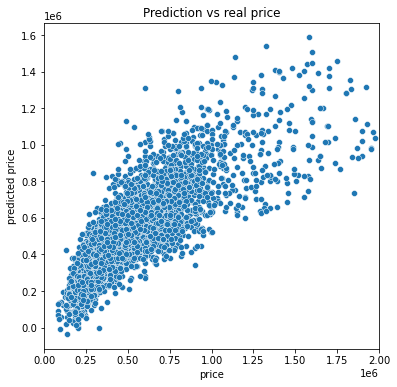

In [49]:
fig, ax1, = plt.subplots()
fig.set_size_inches(6,6)
sns.scatterplot(x='price', y='pred', data=df_test, ax=ax1)
ax1.set_xlim(0, 2000000)
ax1.set_title('Prediction vs real price')
ax1.set_ylabel('predicted price')

Plot the target price/prediction against top (3) features

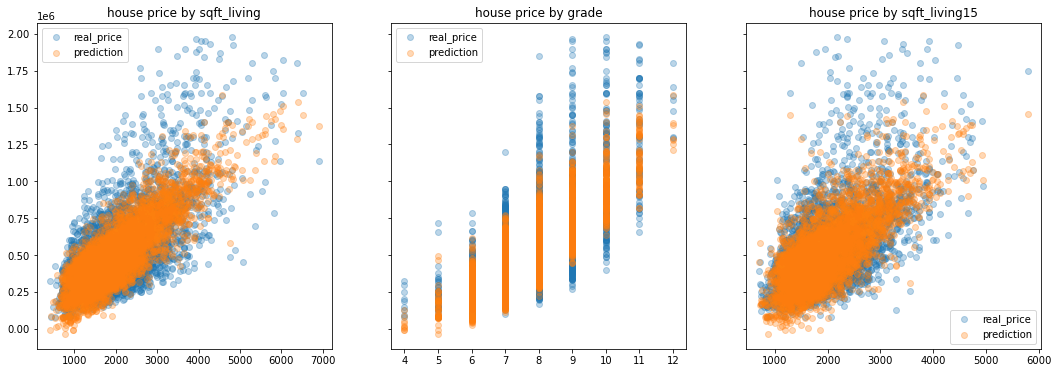

In [50]:
def plot_scatter(ax, by):
    ax.scatter(df_test[by], df_test['price'], alpha=0.3, label='real_price')
    ax.scatter(df_test[by], df_test['pred'], alpha=0.3, label='prediction')
    ax.set_title('house price by ' + by)
    ax.legend()

# plot top n features
n = 3 if len(features) > 3 else len(features)
fig, ax = plt.subplots(1, n, sharey=True)
for i in range(n):
    fig.set_size_inches(6*n,6)
    if isinstance(ax, np.ndarray):
        plot_scatter(ax[i], features[i])
    else:
        plot_scatter(ax, features[i])

### Want to better understand the how the model gets trained and the mathematics behind it?

In this exercise we built a LinearRegression model to predice new outcomes based on the historical outcomes or events, for additional information on the linear regression model please refer to https://scikit-learn.org/stable/modules/linear_model.html

To better understand the mathematics behind the model, I highly recommend the popular machine learning course from coursera: https://www.coursera.org/learn/machine-learning